In [1]:
import pandas as pd

# Reload the baseline cleaned data
train = pd.read_csv('../data/train_clean.csv')
test = pd.read_csv('../data/test_clean.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

print(train['Transported'].value_counts(normalize=True))

print(train['Transported'].dtype)
print(train['Transported'].unique())



Train shape: (8693, 34)
Test shape: (4277, 33)
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64
bool
[False  True]


**Random Forest Classifier (Baseline)**

>Let’s train a Random Forest model on the same data setup used for LightGBM.
This will give us a baseline to compare model types before tuning.

In [2]:
# Train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Load clean data
train = pd.read_csv('../data/train_clean.csv')
test = pd.read_csv('../data/test_clean.csv')

target_col = 'Transported'

drop_cols_train = ['PassengerId', 'Name', 'Surname', 'Cabin',
                   'VIP_confidence', 'Destination_confidence', 'Age_confidence', target_col]

drop_cols_test = ['PassengerId', 'Name', 'Surname', 'Cabin',
                  'VIP_confidence', 'Destination_confidence', 'Age_confidence']


X = train.drop(columns=drop_cols_train)
y = train[target_col].astype(int)

X = pd.get_dummies(X)
test_encoded = pd.get_dummies(test.drop(columns=drop_cols_test))

X, test_encoded = X.align(test_encoded, join='left', axis=1, fill_value=0)


print(X.head(3))
print(y.head(3))



   CryoSleep   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0      False  39.0          0.0        0.0           0.0     0.0     0.0   
1      False  24.0        109.0        9.0          25.0   549.0    44.0   
2      False  58.0         43.0     3576.0           0.0  6715.0    49.0   

   GroupID  GroupSize  CabinNum  ...  CabinDeck_F  CabinDeck_G  CabinDeck_T  \
0        1          1       0.0  ...        False        False        False   
1        2          1       0.0  ...         True        False        False   
2        3          2       0.0  ...        False        False        False   

   CabinDeck_Unknown  CabinSide_P  CabinSide_S  CabinSide_Unknown  \
0              False         True        False              False   
1              False        False         True              False   
2              False        False         True              False   

   Destination_cleaned_55 Cancri e  Destination_cleaned_PSO J318.5-22  \
0                           

In [3]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_results = cross_validate(
    rf,
    X,
    y,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

print("Cross-validation accuracy per fold:")
print(cv_results['test_score'])

print("\nTraining accuracy per fold:")
print(cv_results['train_score'])

print(f"\nMean CV Accuracy: {cv_results['test_score'].mean():.4f}")
print(f"Std Dev CV Accuracy: {cv_results['test_score'].std():.4f}")



rf.fit(X, y)
test_preds = rf.predict(test_encoded)

# Save submission
# submission = pd.DataFrame({
#     'PassengerId': test['PassengerId'],
#     'Transported': test_preds.astype(bool)
# })
# submission.to_csv('../submissions/rf_submission.csv', index=False)

Cross-validation accuracy per fold:
[0.69810236 0.74813111 0.80621047 0.82336018 0.76064442]

Training accuracy per fold:
[0.99956859 0.9997124  0.9997124  0.99956866 0.99985622]

Mean CV Accuracy: 0.7673
Std Dev CV Accuracy: 0.0444


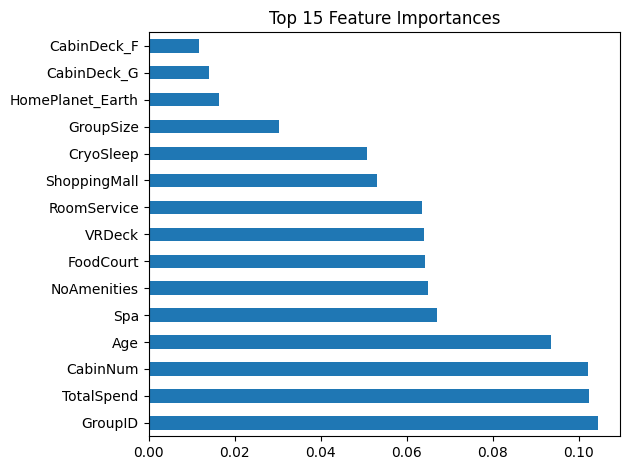

In [4]:
import matplotlib.pyplot as plt

rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()
